## 공학설계 과제 2

본 과제는 7주차 수업시간 중 진행한 실습의 연장선에서 양선형 보간법(bilinear interpolation) 대한 이론을 학습하고, 영상의 회전에 이를 활용하는 사례를 학습함.

아래의 각 문항 별로 본 문서 내에 주어진 답변용 code 또는 markdown 셀에 답변을 작성하면 됨. 
과제 답변 작성 중 인터넷 검색으로 도출된 참고자료를 활용하여 과제를 수행한 경우, 반드시 참고한 자료의 출처를 명시해야 함.
ChatGPT를 활용한 경우에도 활용 여부를 꼭 명시하기 바람.
본 과제에서 아래 패키지들은 기본적으로 활용되므로, 해당 패키지 웹사이트의 API reference는 참고자료 출처 명시할 필요 없음
* Numpy: https://numpy.org/
* Scikit-image: https://scikit-image.org/
* MatPlotLib: https://matplotlib.org/

출처 명시 방법:
    코드 셀 내에 주석으로 또는 별도의 markdown 셀에
        저자/기관, 문서/페이지 제목, 출판지/웹사이트 제목, 날짜, url 등 순으로 기재함
출처 명시 방법 예시:
    # OpenCV.org, "Smoothing Images," OpenCV documentation, 2021.09.27 조회함, 
    # url: https://docs.opencv.org/master/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html


##### 과제 수행 기간: 10.31(화)~11.06(화)

##### 제출 마감: 11.06(화) 15:00

### 아래 셀들은 7주차 수업 시간에 학습한 내용임

##### 환경설정:
ipynb 파일에서는 셀을 실행시킨 순서대로 메모리에 저장하므로 아래 셀을 최초에 실행하여 패키지들을 import하고 실험용 영상을 읽어온 상태로 만들어서 나머지 셀을 수행하도록 함

In [1]:
# 패키지 import
import numpy as np
import skimage
from skimage import io
from matplotlib import pyplot as plt

##### 전처리 셀 1: 영상 loading
아래 셀은 convolution을 적용하고자 하는 영상을 불러오고, 해당 영상을 정수형 영상(각 픽셀 값이 [0~255] 범위의 값을 가짐)에서 소수점형 영상(픽셀 값이 [0~1] 범위의 값을 가짐)으로 변형하는 과정을 수행함

(1433, 1024, 3)


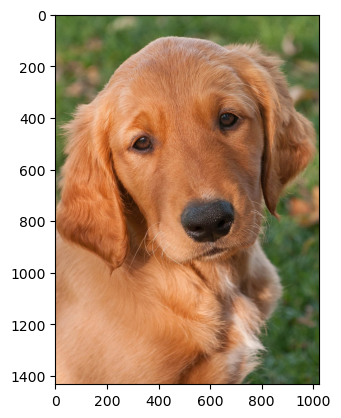

In [22]:
img = io.imread("/Users/jiyoung/Desktop/univ/'23-2/Engineering Design/HW/dog.jpeg") #파일 경로는 각자의 환경 및 파일에 맞춰서 수정하여 실행함
img = img/255.0

# 읽어온 영상을 확인하고 싶으면 아래 줄 주석 해제하여 실행함
plt.imshow(img)
print(img.shape)

##### 전처리 셀 2: 회전된 영상의 규격 계산

읽어들인 영상의 크기와 회전의 각도를 반영하여 회전된 영상의 픽셀 규격을 계산하고 이에 맞춰 회전된 영상의 변수를 생성함.

In [23]:
# size of loaded image 
w = img.shape[1]
h = img.shape[0]

# rotation angle
th = np.pi/4

# 4 corner point coordinates of image
p = np.array([[0,0],[w,0],[w,h],[0,h]])
# rotation matrix with rotation angle th
r = np.array([[np.cos(th), -np.sin(th)],[np.sin(th), np.cos(th)]])

# rotation matrix-point matrix multiplication 
rp = r@p.transpose()
print(rp)

# compute offset and shift
offset_x = np.min(rp[0,:])
offset_y = np.min(rp[1,:])
print(offset_x)
print(offset_y)
# rotated image width/height = rw, rh
rw = int(round(np.max(rp[0,:])-offset_x))
rh = int(round(np.max(rp[1,:])-offset_y))

# assign variable for rotated image
rot_img = np.zeros((rh,rw,img.shape[2]))

[[    0.           724.07734394  -289.20667351 -1013.28401744]
 [    0.           724.07734394  1737.36136138  1013.28401744]]
-1013.2840174403225
0.0


##### 문제 1: Bilinear interpolation 이론 학습

Box filtering과 관련된 이론과 연관되는 내용을 우리 수업 교재에서 찾아서 확인하고 해당 내용을 간단하게 요약하여  작성하시오.

##### 문제 1 답변

-여기에 답변을 작성하시오. 답변 작성시 본 문구는 삭제하고 작성하시오.-

##### 문제 2: Bilinear interpolation을 이용한 영상 회전 구현

아래 셀에 빈 줄들을 채워 양선형 보간법을 활용한 영상 회전 코드를 완성하시오.

In [ ]:
# inverse of rotation matrix (rotate by -th)
r_inv = np.array([[np.cos(th), np.sin(th)],[-np.sin(th), np.cos(th)]])

# for all pixel coordinates in rotated image
for y in np.arange(rh):
    for x in np.arange(rw):
        # compute corresponding point from original image
        
        # YOUR CODE HERE #

        # interpolate original pixels to fill in rotated_image pixel
        rot_img[y,x,:] = # YOUR CODE HERE #

##### 문제 3: Bilinear interpolation을 이용한 영상 회전 함수 구현

위의 전처리 셀2와 문제 2의 셀을 통합하여 인자로 입력된 각도 변수 th만큼 입력 영상을 회전하여 반환하는 함수를 구현하시오.

In [ ]:
def rotate_image(img, theta):
    # YOUR CODE HERE #

    # END OF YOUR CODE
    return rot_img

##### 후처리 셀 1: 영상 회전 함수를 호출하여 영상을 회전하고 회전된 영상을 화면에 제시함

In [ ]:
# load image to rotate
img = io.imread("your_image.jpg") #파일 경로는 각자의 환경 및 파일에 맞춰서 수정하여 실행함
img = img/255.0

# set rotation angle
theta = np.pi/3

# perform rotation
rot_img = rotate_image(img, theta)

# show and save the rotated image
plt.imshow(rot_img)
plt.imsave('rot_img.png',rot_img)